In [1]:
import numpy as np
import networkx as nx
import torch
import matplotlib.pyplot as plt
from experiments.sol_propagator import PDESolutionPropogator
from experiments.visuallization_utils import plot_pde_sols
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
G1 = nx.cycle_graph(10)
G1.add_edge(0, 5)

G21 = nx.cycle_graph(5)
G22 = nx.cycle_graph(5)
mapping = {i: i+5 for i in range(5)}
G22 = nx.relabel_nodes(G22, mapping)
G2 = nx.union(G21, G22)
G2.add_edge(0, 5)

graphs = [G1, G2]

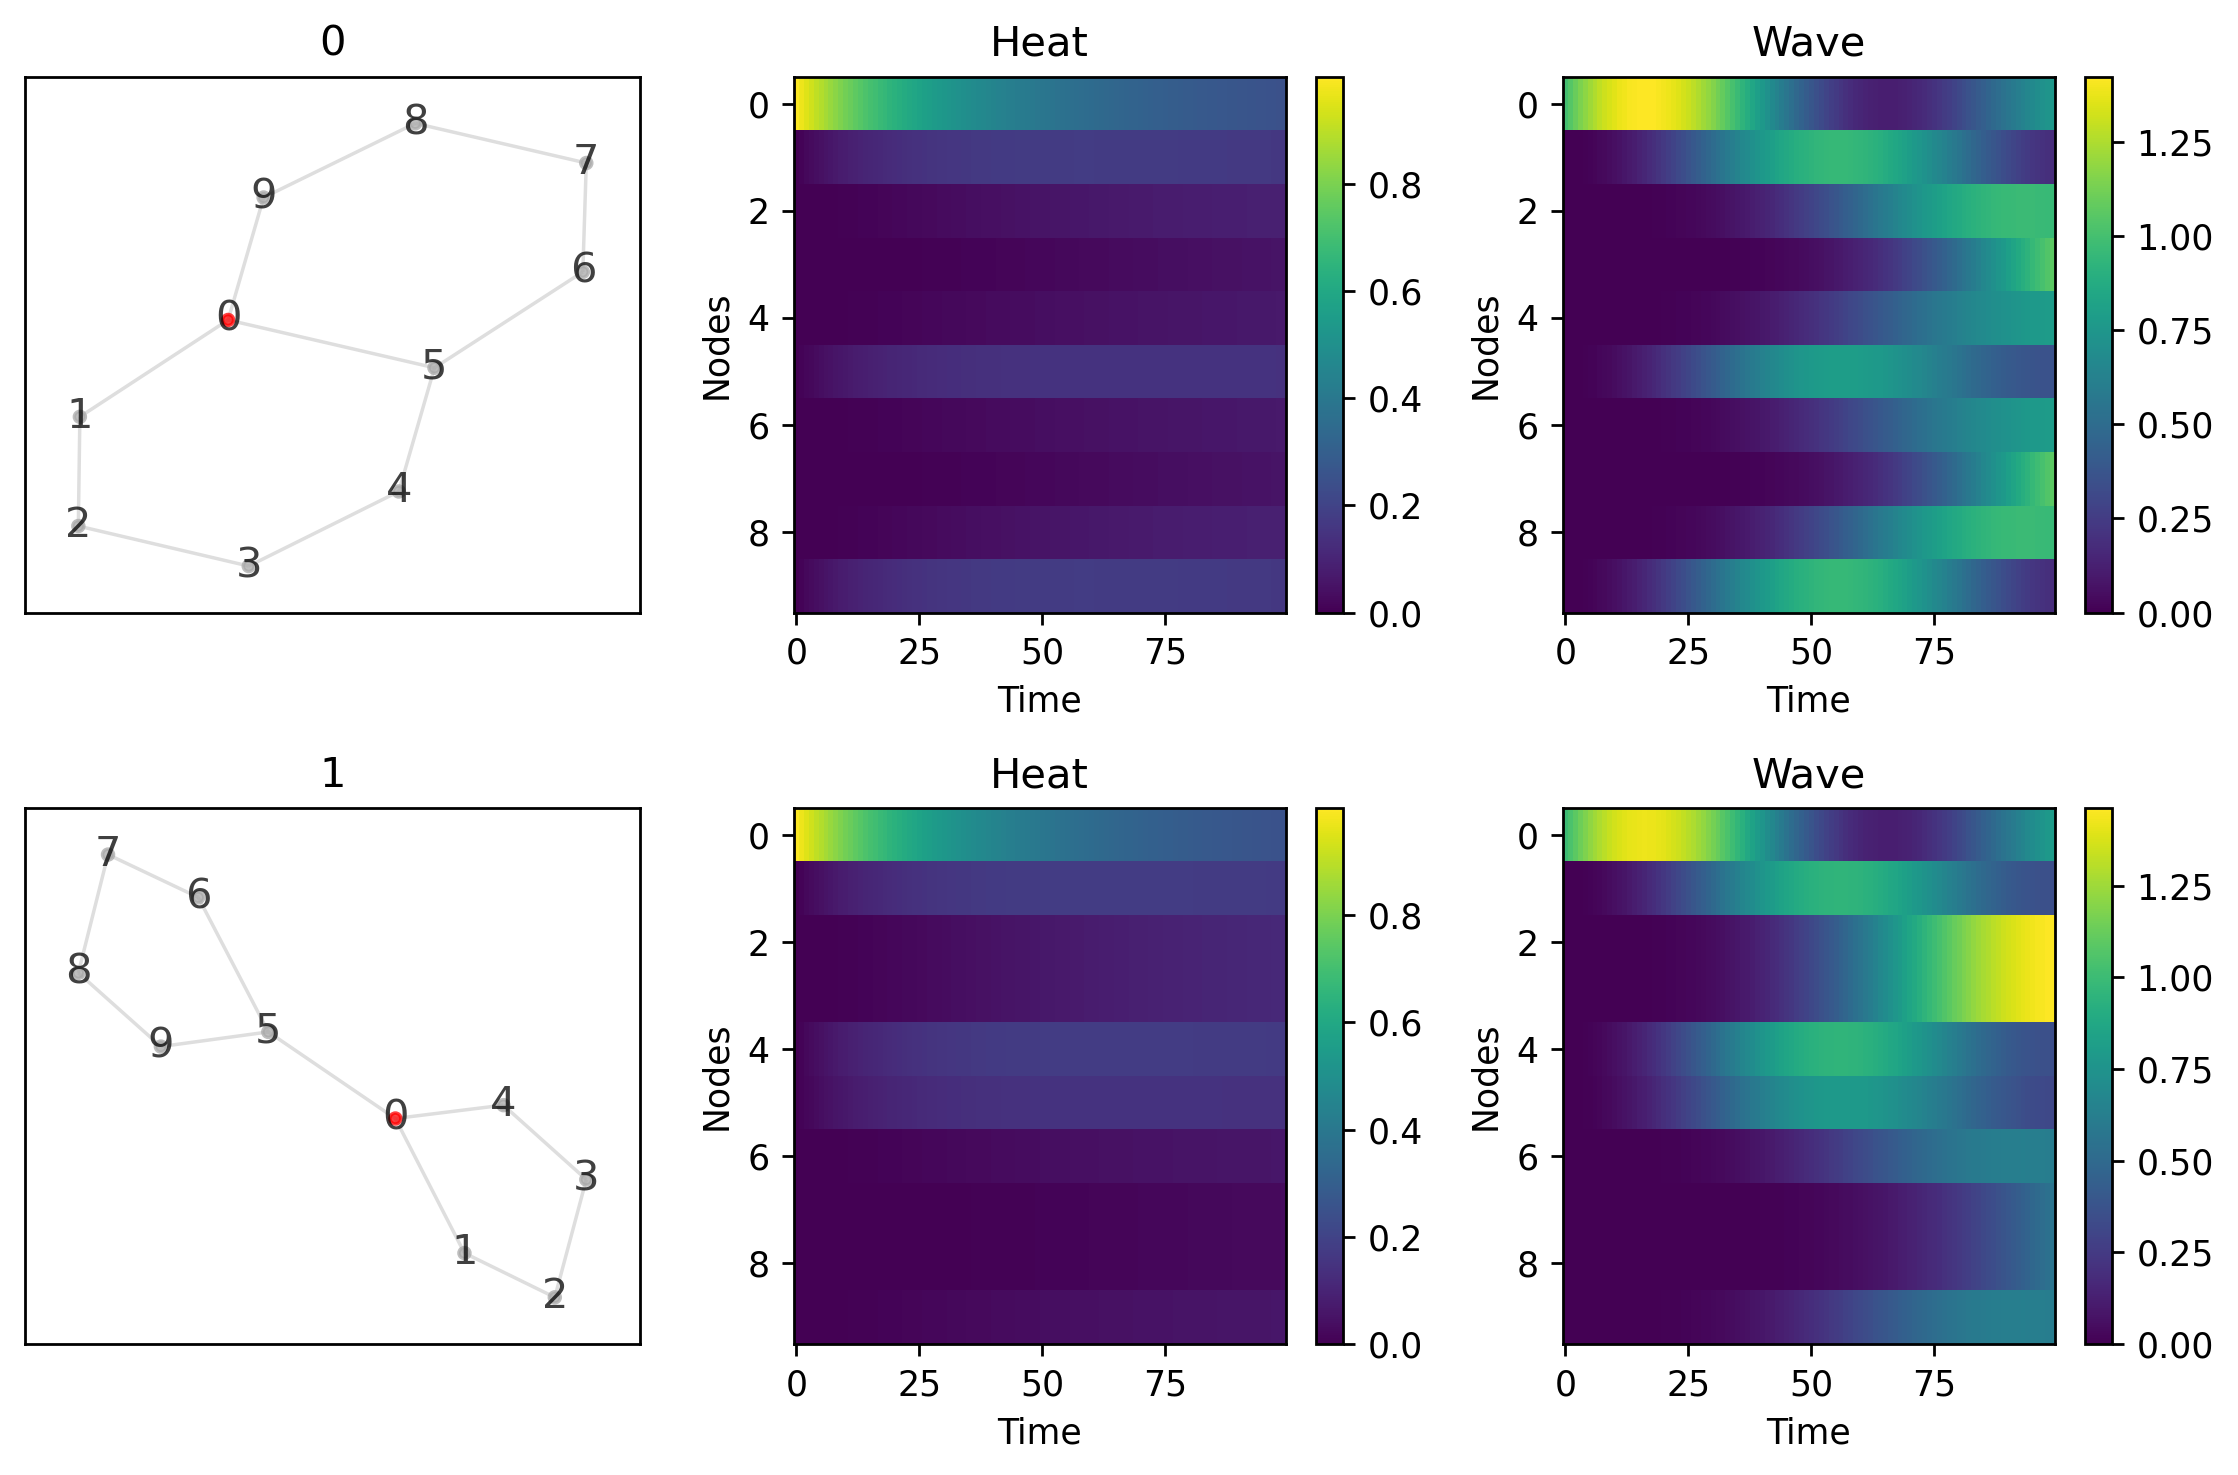

In [35]:
res1 = plot_pde_sols(graphs, device, c=0.5, dirac_ids=[0], display_labels=True)

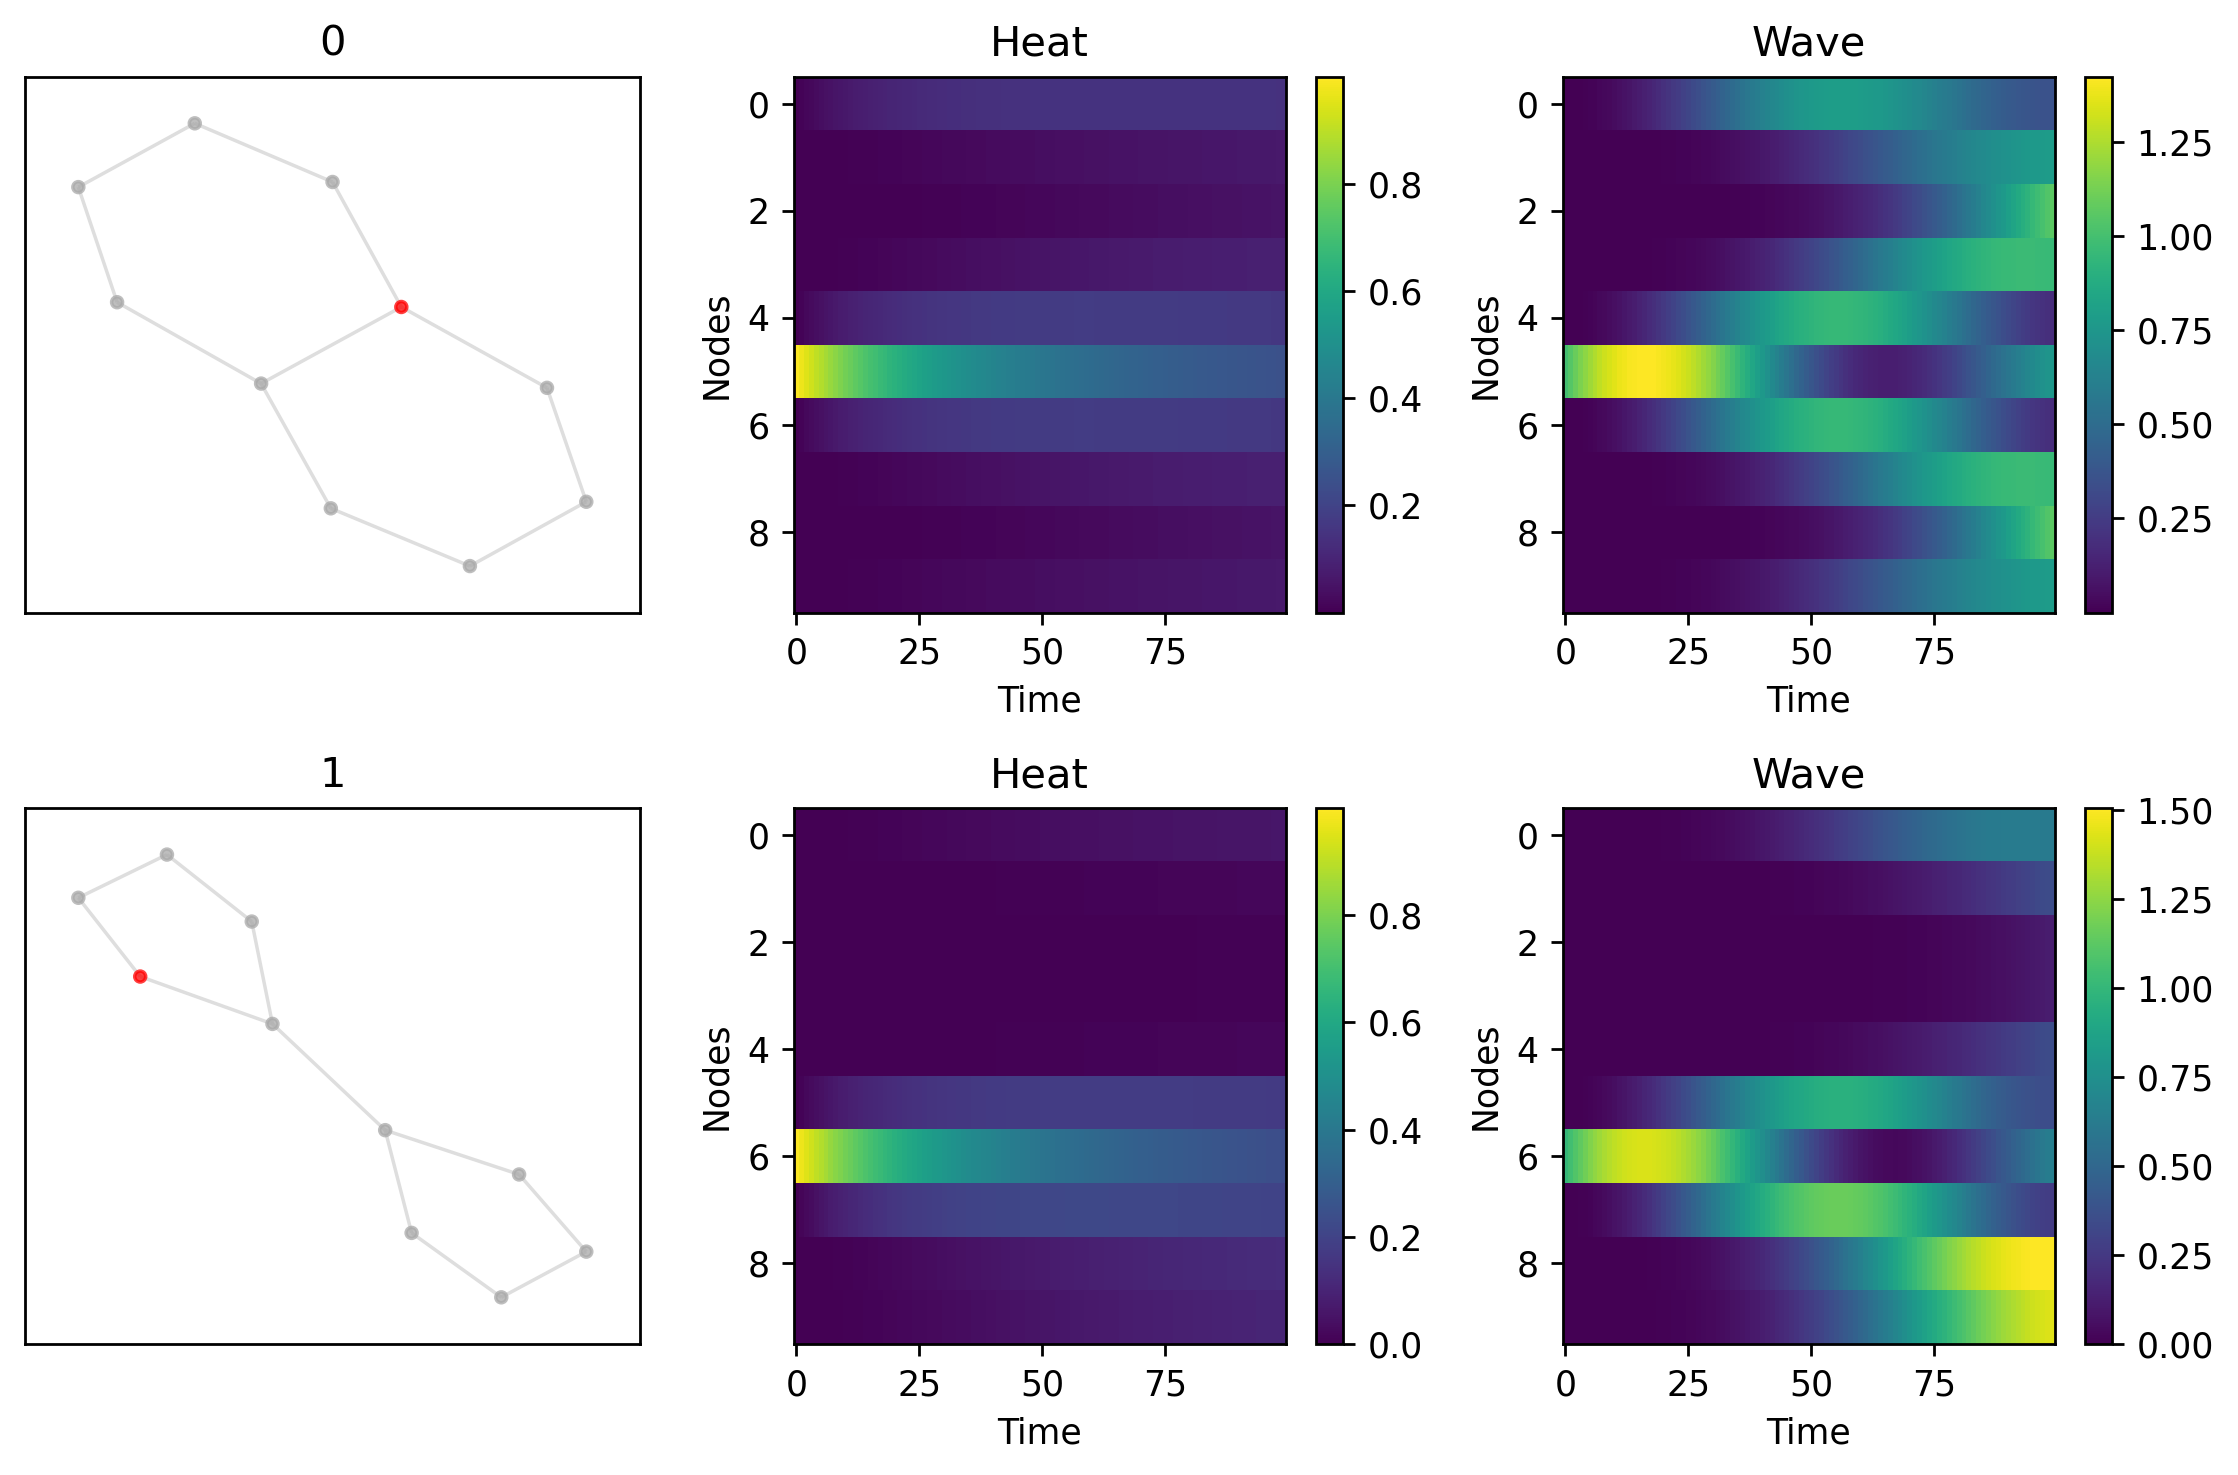

In [9]:
res2 = plot_pde_sols(graphs, device, c=0.5, random_dirac=True, random_num=1)

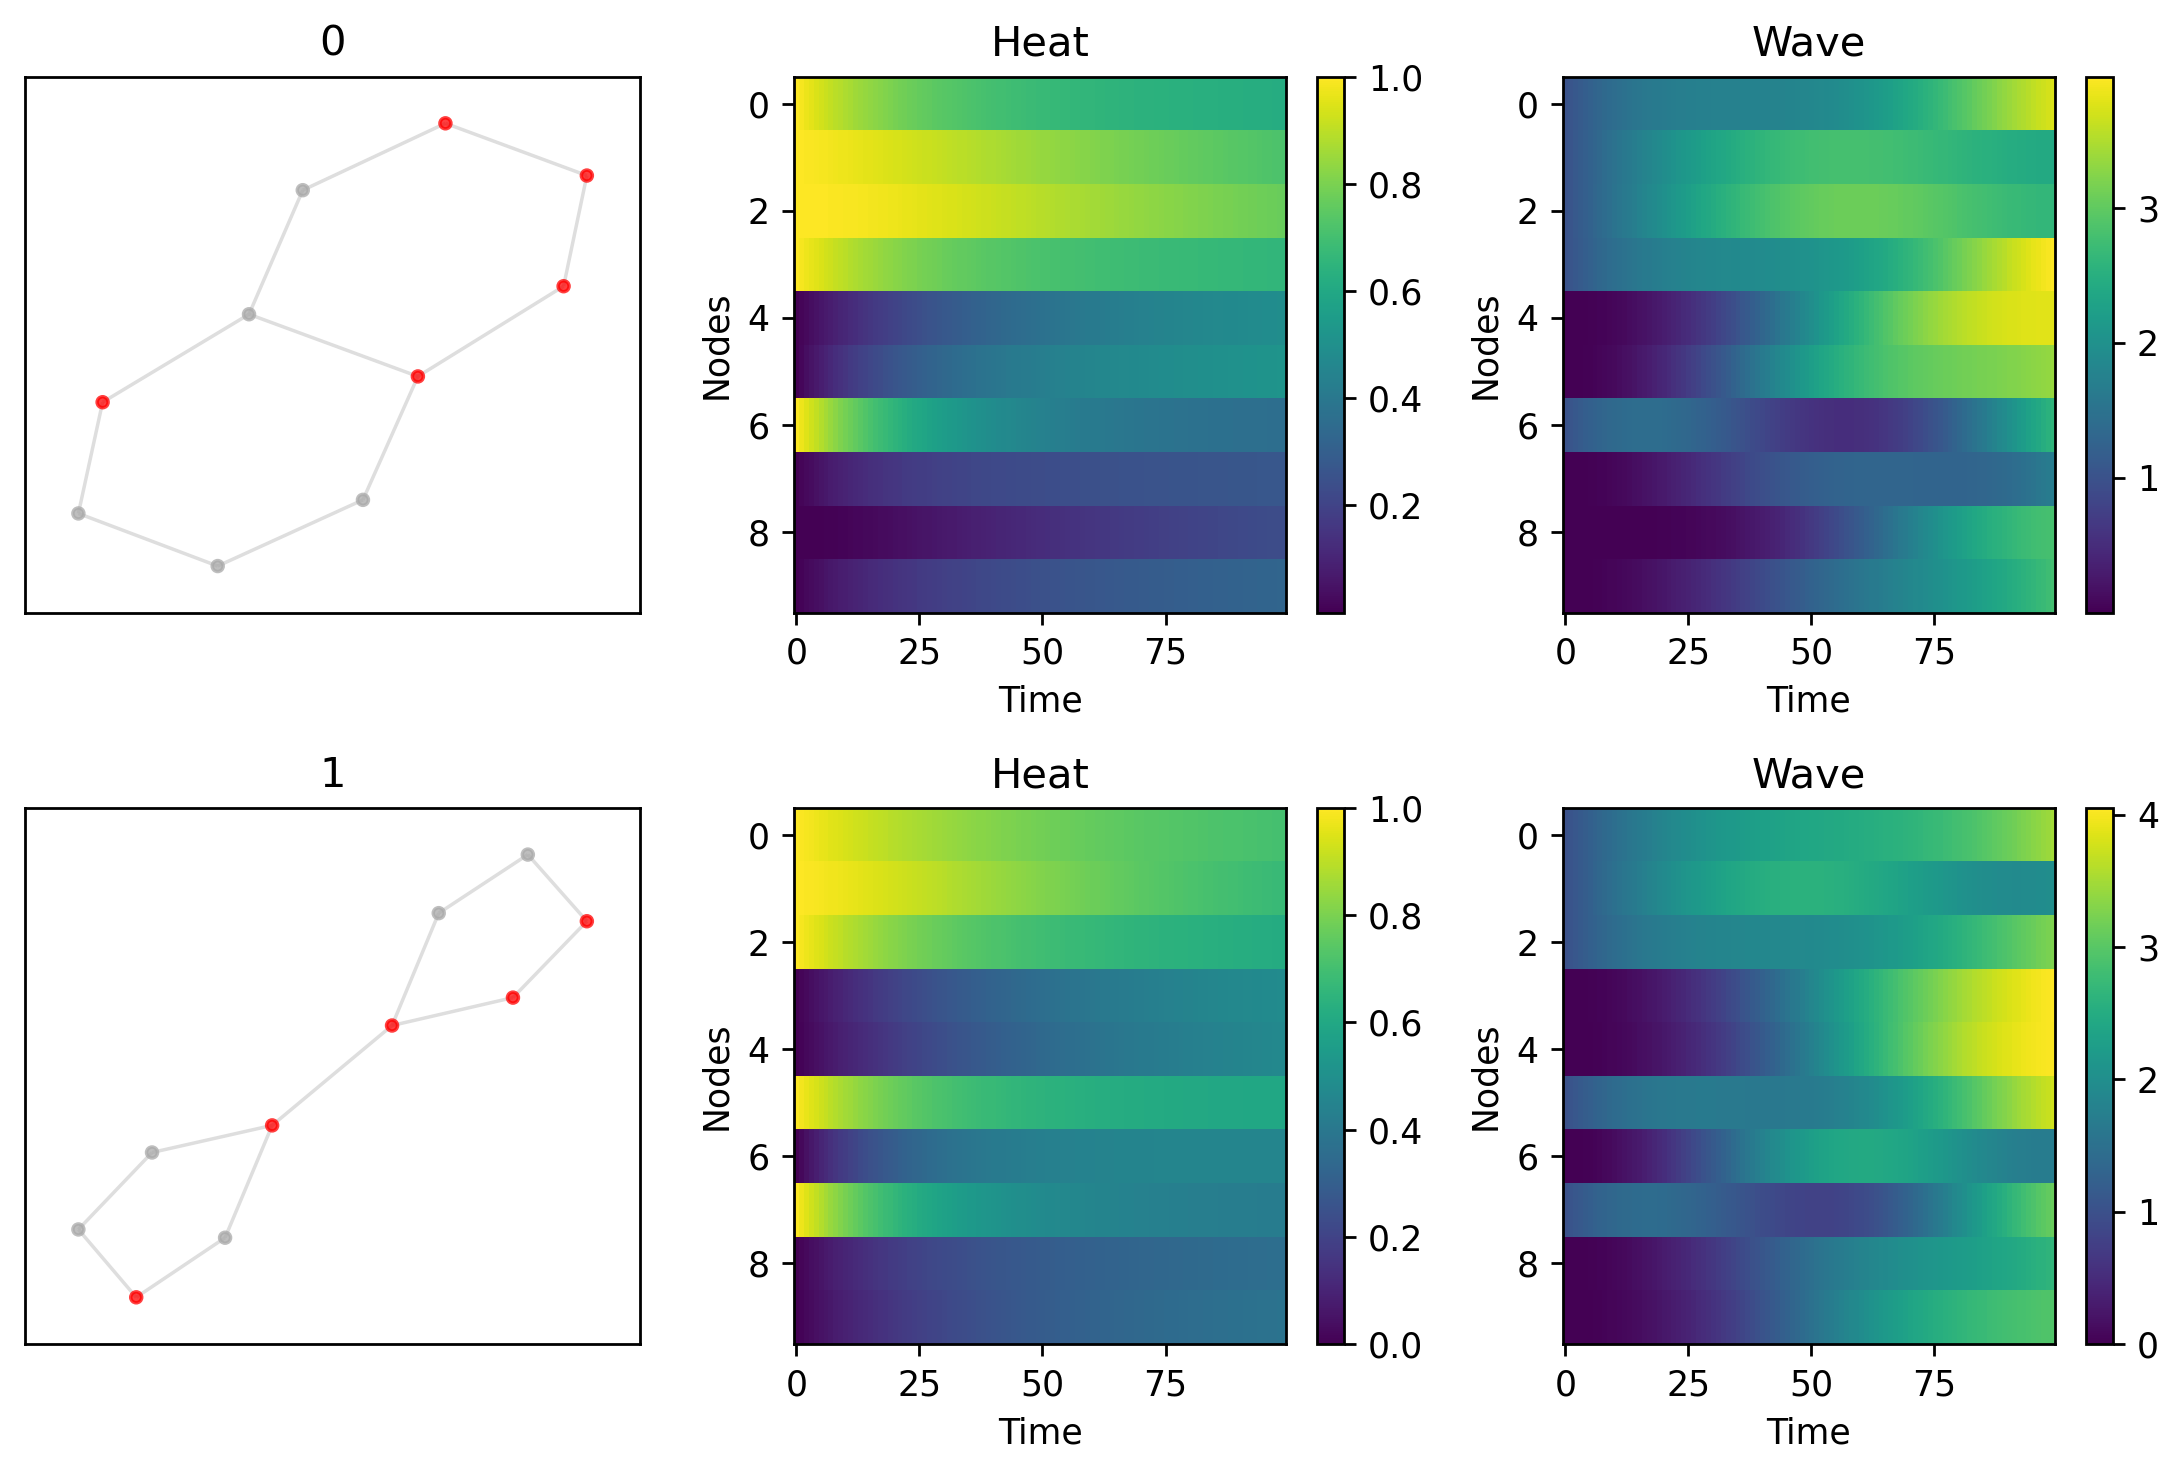

In [10]:
res3 = plot_pde_sols(graphs, device, c=0.5, random_dirac=True, random_num=5)

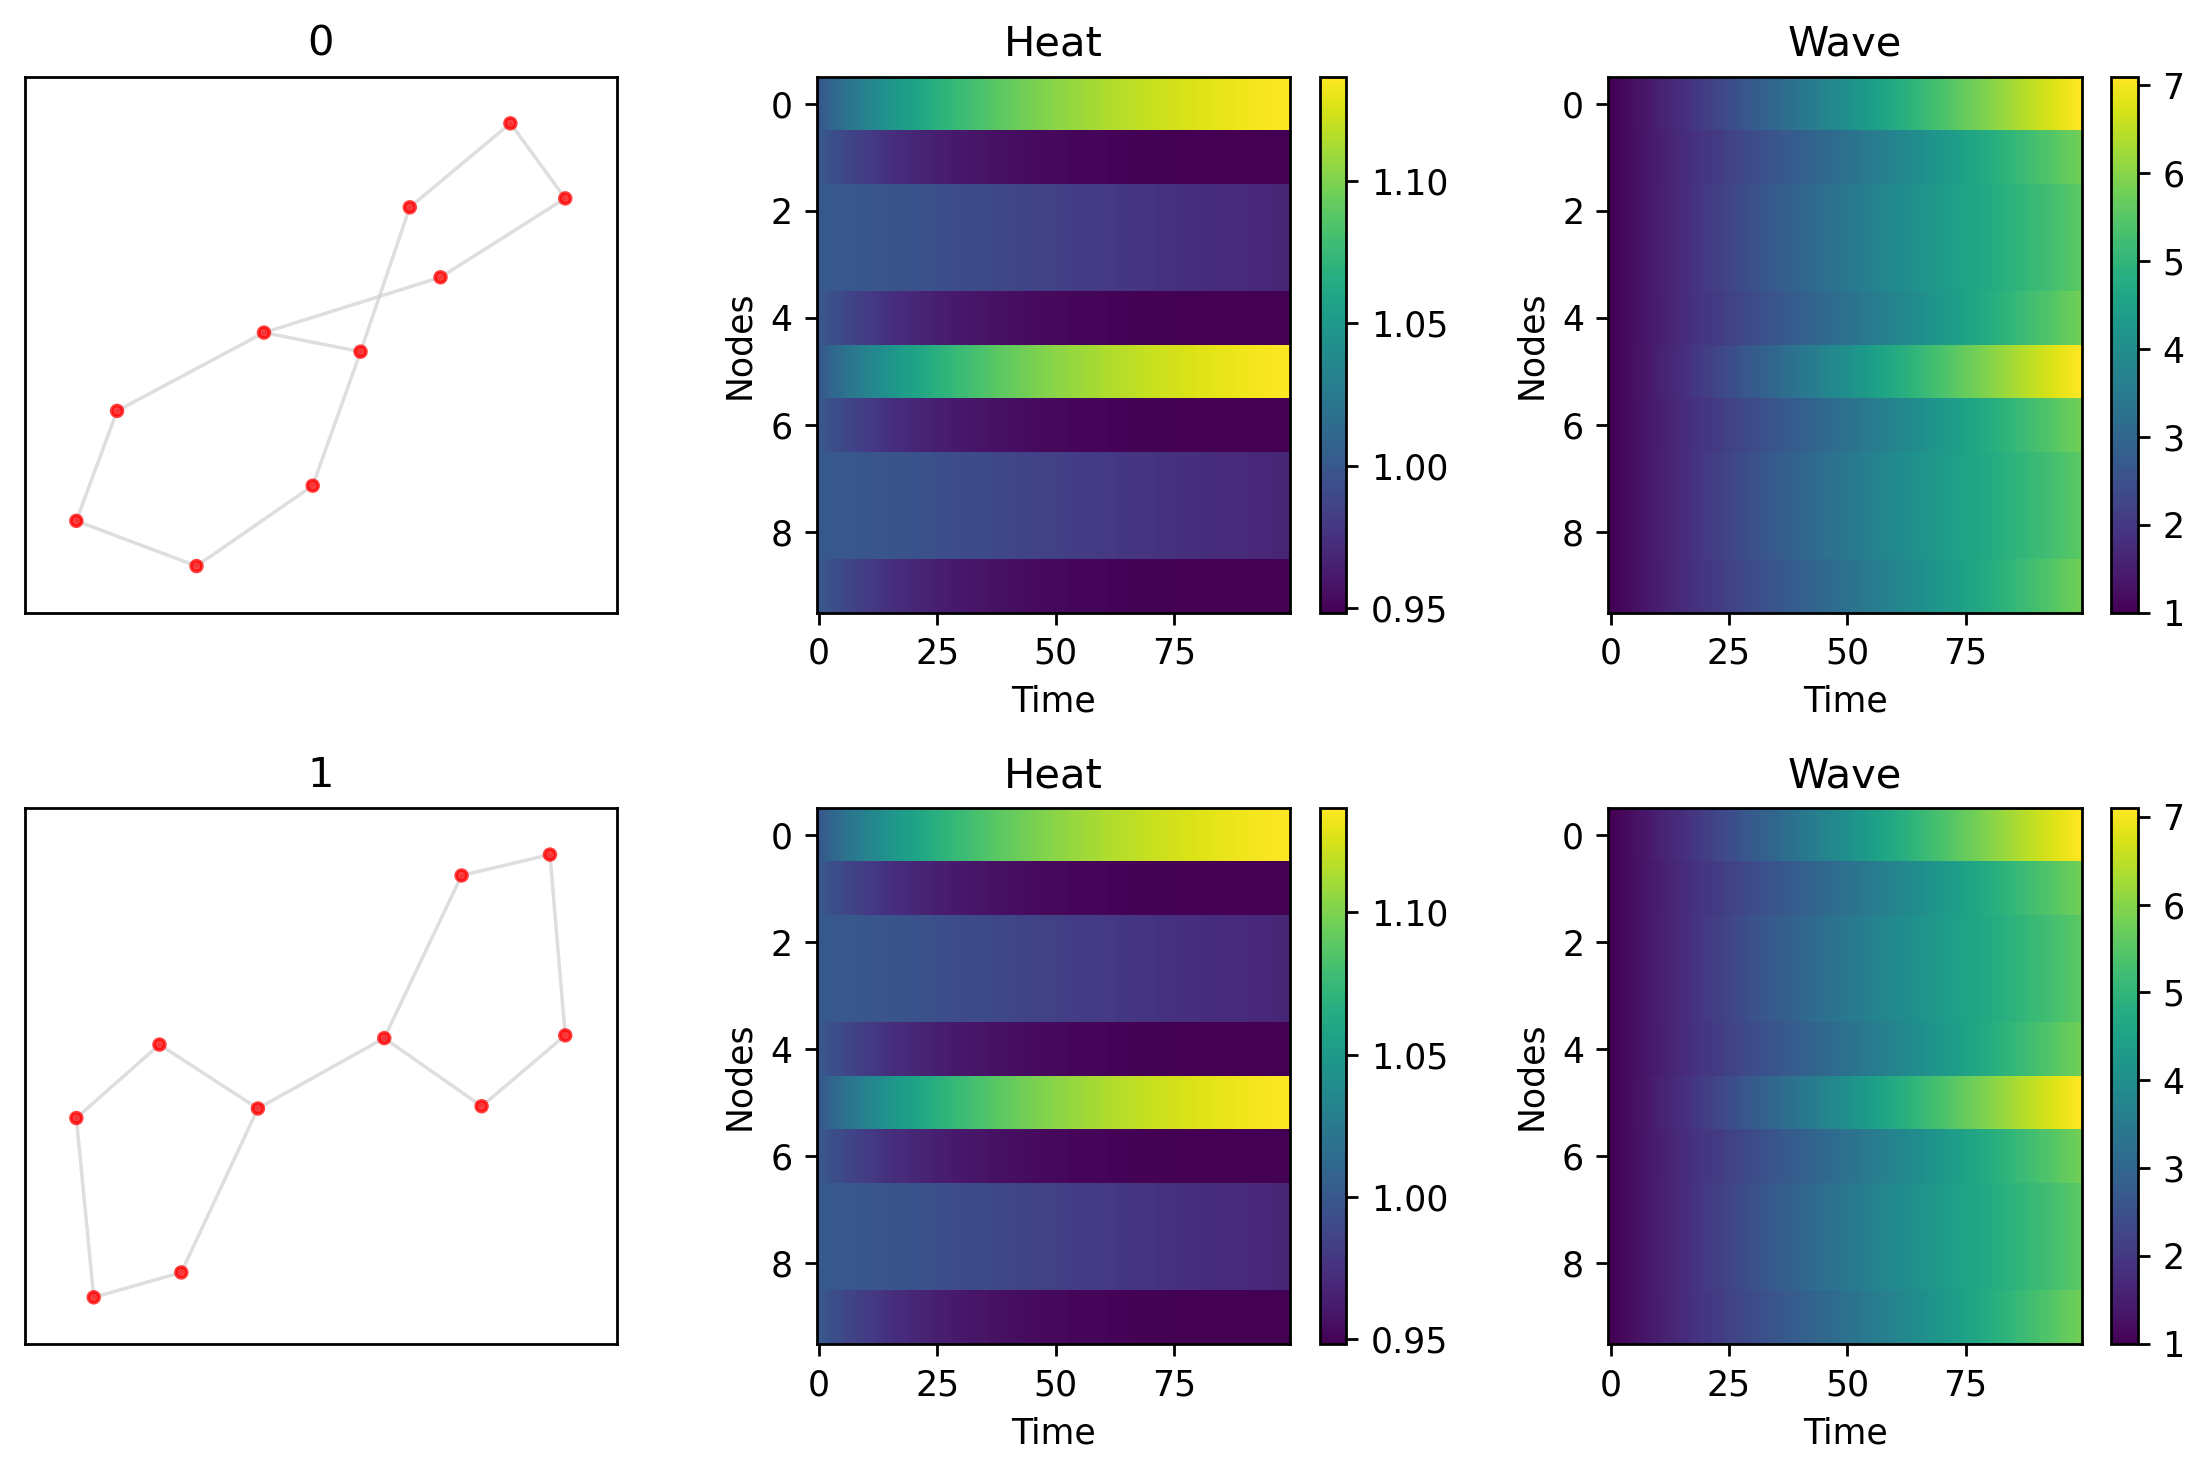

In [11]:
res4 = plot_pde_sols(graphs, device, c=0.5, dirac_ids=[i for i in range(10)])

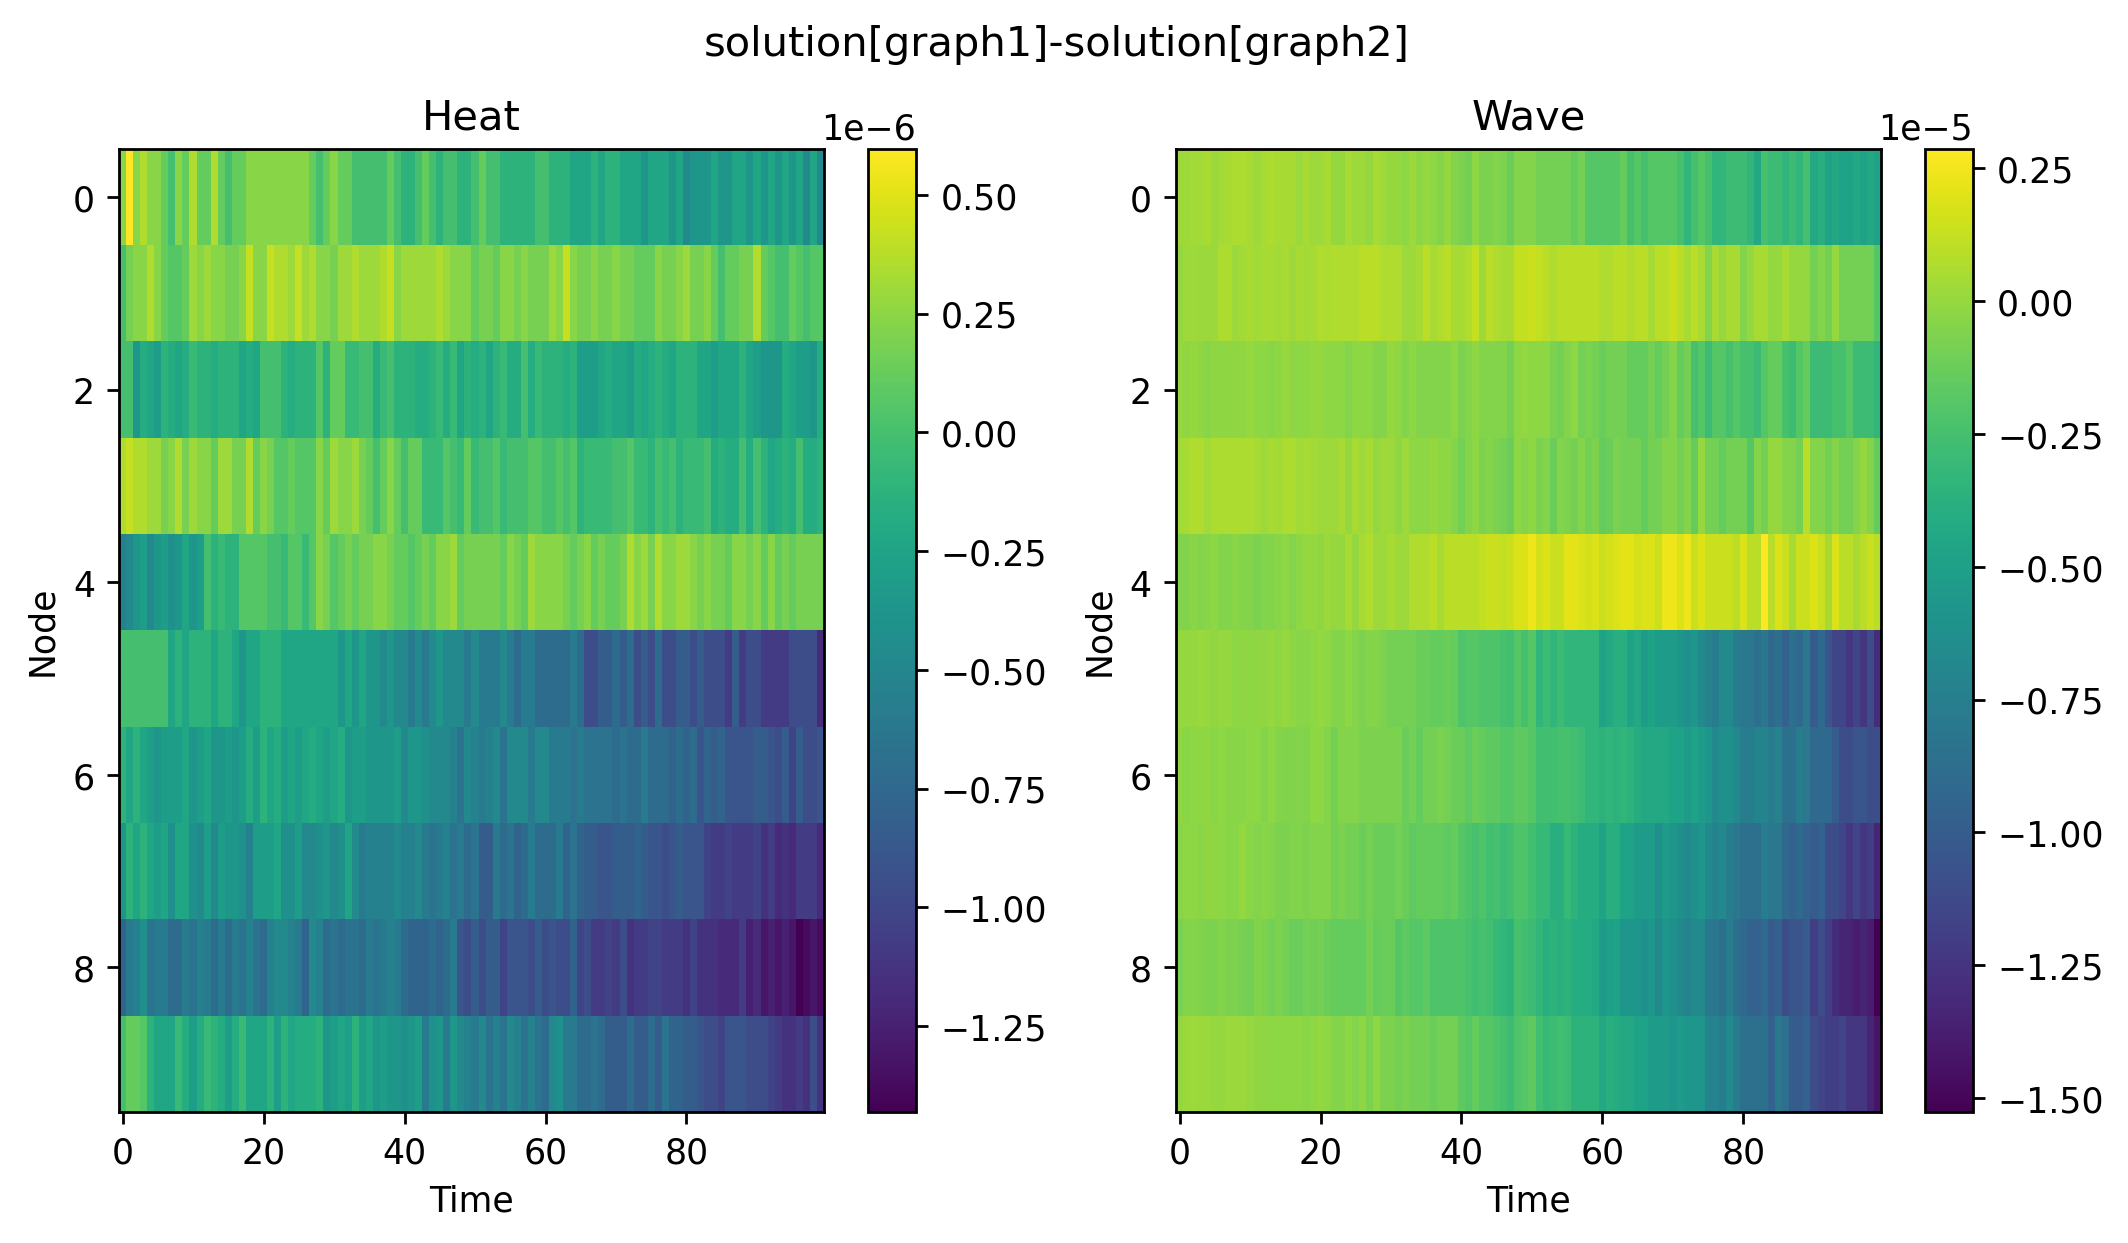

In [38]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5), dpi=250)

# Plot the first image in the first subplot
im1 = ax1.imshow(res4[0]['heat'] - res4[1]['heat'], aspect='auto')
ax1.set_title('Heat')
fig.colorbar(im1, ax=ax1)

# Plot the second image in the second subplot
im2 = ax2.imshow(res4[0]['wave'] - res4[1]['wave'], aspect='auto')
ax2.set_title('Wave')
fig.colorbar(im2, ax=ax2)

# Set the title of the figure
fig.suptitle('solution[graph1]-solution[graph2]')

# Set the x and y axis labels for both subplots
for ax in [ax1, ax2]:
    ax.set_xlabel('Time')
    ax.set_ylabel('Node')

# Display the figure
plt.show()


In [48]:
diffh = np.abs(res1[0]['heat'] - res1[1]['heat']).max()
diffw = np.abs(res1[0]['wave'] - res1[1]['wave']).max()
print(f'max difference of heat among all times between graph 1 and graph 2 :{diffh}')
print(f'max difference of wave among all times between graph 1 and graph 2 :{diffw}')

max difference of heat among all times between graph 1 and graph 2 :0.14118875563144684
max difference of wave among all times between graph 1 and graph 2 :0.7369424104690552


In [49]:
diffh = np.abs(res4[0]['heat'] - res4[1]['heat']).max()
diffw = np.abs(res4[0]['wave'] - res4[1]['wave']).max()
print(f'max difference of heat among all times between graph 1 and graph 2 :{diffh}')
print(f'max difference of wave among all times between graph 1 and graph 2 :{diffw}')

max difference of heat among all times between graph 1 and graph 2 :1.430511474609375e-06
max difference of wave among all times between graph 1 and graph 2 :1.52587890625e-05
